In [1]:
%matplotlib inline

In [5]:
import cv2
from geospatial_learn import raster
from geospatial_learn.utilities import do_phasecong
from math import ceil 
import matplotlib.pyplot as plt

In [6]:
inRas = 'figures/weetestorig.tif'

img = raster.raster2array(inRas, bands=[2])

In [7]:
plt.imshow(img)
plt.show()

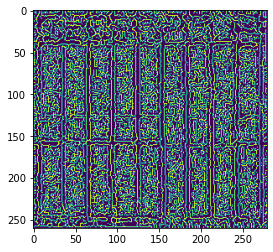

In [31]:
gimg = cv2.GaussianBlur(img,(5,5),0)
edge  = cv2.Canny(gimg, 0, 0)
plt.imshow(edge)

In [5]:

def icanny(high_threshold, *args, **kwargs): #...do it
    
    inIm = img#.astype(np.float)
    #inIm[inIm==0]=np.nan 
    
   # gimg = cv2.GaussianBlur(img,(5,5),0)
    low_threshold = high_threshold / 2
    edge = canny(inIm, low_threshold=low_threshold,  high_threshold=high_threshold, *args, **kwargs)
    #edge = cvcanny(inIm, *args, **kwargs)
    
    
    
    plt.figure(figsize=(15,15))
    
    
    plt.subplot(122)
    plt.imshow(edge)
    plt.show()
    
#    return edge
    
    
from ipywidgets import widgets

cTester = widgets.interact(icanny,
                           #k=widgets.IntSlider(min=3, max=100, step=2, continuous_update=False),
                              sigma=widgets.IntSlider(min=0, max=100, step=1, continuous_update=False),
                              #low_threshold=widgets.IntSlider(min=0, max=255, step=1, continuous_update=False),
                              high_threshold=widgets.IntSlider(min=0, max=255, step=2, continuous_update=False))

interactive(children=(IntSlider(value=0, continuous_update=False, description='high_threshold', max=255, step=…

In [8]:
def cvcanny(img,  k, sigma, low_threshold=0, high_threshold=0):
    gimg = cv2.GaussianBlur(img,(k,k),sigma)
    edge  = cv2.Canny(gimg, low_threshold, high_threshold)
    return edge
    
def icanny(k, high_threshold, *args, **kwargs): #...do it
    
    inIm = img#.astype(np.float)
    
    # or from sigma 
    #k=2*ceil(3*sigma)+1
    # or kernel size
    sigma=(k-1)/6
    
    low_threshold = high_threshold / 6

    edge = cvcanny(inIm, k, low_threshold, sigma, *args, **kwargs)
    
    plt.figure(figsize=(15,15))
    
    

#    plt.subplot(121)
#    plt.imshow(imgc)
    
    plt.subplot(122)
    plt.imshow(edge)
    plt.show()
    
    
    
from ipywidgets import widgets

cTester = widgets.interact(icanny,
                           k=widgets.IntSlider(min=3, max=100, step=2, continuous_update=False),
                              #sigma=widgets.IntSlider(min=1, max=100, step=1, continuous_update=False),
                              #low_threshold=widgets.IntSlider(min=0, max=255, step=1, continuous_update=False),
                              high_threshold=widgets.IntSlider(min=0, max=255, step=2, continuous_update=False))

interactive(children=(IntSlider(value=3, continuous_update=False, description='k', min=3, step=2), IntSlider(v…

In [17]:
def iphase(*args, **kwargs): #...do it
    

    
    edge = do_phasecong(img, *args, **kwargs)
    plt.figure(figsize=(20,10))

    plt.imshow(edge)
    plt.show()
    

    
from ipywidgets import widgets

cTester = widgets.interact(iphase,
                           sigma=widgets.IntSlider(min=0, max=50, step=1, continuous_update=False),
                              low_t=widgets.IntSlider(min=0, max=256, step=1, continuous_update=False),
                              hi_t=widgets.IntSlider(min=0, max=256, step=1, continuous_update=False))

interactive(children=(IntSlider(value=0, continuous_update=False, description='sigma', max=50), IntSlider(valu…